<a href="https://colab.research.google.com/github/vinay5751/fruit_classification/blob/master/Fruit360_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [24]:
files.upload()#Upload Your Kaggle API Json File

{}

In [0]:
"Creating .kaggke Folder"""
!mkdir -p ~/.kaggle
"""Copying kaggle.json File To .kaggle"""
!cp kaggle.json ~/.kaggle/
"""Changing Access Mode Of File"""
!chmod 600 ~/.kaggle/kaggle.json
pass

In [26]:
"""Downloading Data From Kaggle"""
!kaggle datasets download -d moltean/fruits #Downloading data from kaggle

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
'''Extracting Downloaded File'''
from zipfile import ZipFile
file_name = "/content/fruits.zip"

with ZipFile(file_name,"r") as zip:
    zip.extractall()
    print("Extraction Done")

Extraction Done


In [0]:
"""Importing Modules"""
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import shuffle
from tqdm import tqdm
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
"""Defining Constant Variables"""
TRAIN_DIR = '/content/fruits-360/Training/'
TEST_DIR = '/content/fruits-360/Test/'
IMG_SIZE = 100

In [0]:
"""This function will give label to the image path passed"""
def image_label(img):
    word_label = img.split("/")[-1]
    return(word_label)

In [0]:
"""This function will generate the training data"""
def create_training_data():
    training_data = []
    for img_label in os.listdir(TRAIN_DIR):
        label = image_label(img_label)
        path = os.path.join(TRAIN_DIR,img_label)
        for img in tqdm(os.listdir(path)):
            img = os.path.join(path,img)
            img_ = cv2.imread(img)
            img_ =cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
            #img = cv2.resize(img_, (IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img_),label])
    shuffle(training_data)
    #np.save('train_data.npy', training_data)
    return (training_data)

In [32]:
"""def process_test_data():
    testing_data = []
    for test in os.listdir(TEST_DIR):
        path = os.path.join(TEST_DIR,test)
        for img in path:
            img_name = img.split('.')[0]
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            #img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            testing_data.append([np.array(img), img_name])
        
    shuffle(testing_data)
    #np.save('test_data.npy', testing_data)
    return (testing_data)"""

"def process_test_data():\n    testing_data = []\n    for test in os.listdir(TEST_DIR):\n        path = os.path.join(TEST_DIR,test)\n        for img in path:\n            img_name = img.split('.')[0]\n            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)\n            #img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))\n            testing_data.append([np.array(img), img_name])\n        \n    shuffle(testing_data)\n    #np.save('test_data.npy', testing_data)\n    return (testing_data)"

In [0]:
def hot_encode(fruit_list):
    values = np.array(fruit_list)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return(onehot_encoded)        

In [34]:
train_data = create_training_data()

100%|██████████| 735/735 [00:00<00:00, 1543.06it/s]


Peach Flat


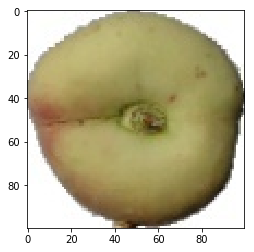

In [35]:
"""This is just made to see the Label and image.
Just change the value of j to do so"""
j=0
print(train_data[j][1])
plt.imshow(train_data[j][0])

In [0]:
arr_train_data = np.array(train_data)

In [37]:
arr_train_data.shape

(48905, 2)

In [38]:
a = set(arr_train_data[:,1])
print(a)

{'Tangelo', 'Limes', 'Pear Abate', 'Pear Kaiser', 'Pineapple', 'Tamarillo', 'Cherry Rainier', 'Salak', 'Plum 2', 'Banana', 'Kaki', 'Strawberry Wedge', 'Guava', 'Grapefruit Pink', 'Apricot', 'Avocado ripe', 'Strawberry', 'Dates', 'Redcurrant', 'Apple Red Delicious', 'Apple Braeburn', 'Lemon', 'Cherry 2', 'Apple Golden 1', 'Passion Fruit', 'Cherry 1', 'Avocado', 'Physalis with Husk', 'Grape Blue', 'Cherry Wax Black', 'Pear Monster', 'Tomato 3', 'Cantaloupe 2', 'Peach Flat', 'Orange', 'Lychee', 'Grape White 2', 'Tomato 4', 'Carambula', 'Mulberry', 'Mangostan', 'Tomato Cherry Red', 'Peach', 'Quince', 'Mango', 'Plum', 'Granadilla', 'Cherry Wax Red', 'Nectarine', 'Papaya', 'Walnut', 'Cactus fruit', 'Peach 2', 'Grape Pink', 'Physalis', 'Pitahaya Red', 'Grape White 4', 'Pear Williams', 'Grapefruit White', 'Tomato 2', 'Rambutan', 'Apple Golden 3', 'Mandarine', 'Raspberry', 'Cherry Wax Yellow', 'Apple Red Yellow 1', 'Apple Golden 2', 'Apple Red 1', 'Chestnut', 'Grape White 3', 'Kumquats', 'Cleme

In [39]:
fruit_list = arr_train_data[:,1]
k = hot_encode(fruit_list)
dic_f = []
for i in range(len(k)):
    dic_f.append([k[i].argmax(),fruit_list[i]])
dic_f = dict(dic_f)
dic_f

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


{0: 'Apple Braeburn',
 1: 'Apple Golden 1',
 2: 'Apple Golden 2',
 3: 'Apple Golden 3',
 4: 'Apple Granny Smith',
 5: 'Apple Red 1',
 6: 'Apple Red 2',
 7: 'Apple Red 3',
 8: 'Apple Red Delicious',
 9: 'Apple Red Yellow 1',
 10: 'Apple Red Yellow 2',
 11: 'Apricot',
 12: 'Avocado',
 13: 'Avocado ripe',
 14: 'Banana',
 15: 'Banana Lady Finger',
 16: 'Banana Red',
 17: 'Cactus fruit',
 18: 'Cantaloupe 1',
 19: 'Cantaloupe 2',
 20: 'Carambula',
 21: 'Cherry 1',
 22: 'Cherry 2',
 23: 'Cherry Rainier',
 24: 'Cherry Wax Black',
 25: 'Cherry Wax Red',
 26: 'Cherry Wax Yellow',
 27: 'Chestnut',
 28: 'Clementine',
 29: 'Cocos',
 30: 'Dates',
 31: 'Granadilla',
 32: 'Grape Blue',
 33: 'Grape Pink',
 34: 'Grape White',
 35: 'Grape White 2',
 36: 'Grape White 3',
 37: 'Grape White 4',
 38: 'Grapefruit Pink',
 39: 'Grapefruit White',
 40: 'Guava',
 41: 'Hazelnut',
 42: 'Huckleberry',
 43: 'Kaki',
 44: 'Kiwi',
 45: 'Kumquats',
 46: 'Lemon',
 47: 'Lemon Meyer',
 48: 'Limes',
 49: 'Lychee',
 50: 'Mand

In [0]:
"""Replacing string label with hot encoded label"""
count = 0
for item in k:
    arr_train_data[:,1][count] = k[count]
    count+=1

In [0]:
train = arr_train_data[:-10000]
test = arr_train_data[-10000:]

In [42]:
train.shape

(38905, 2)

In [43]:
test.shape

(10000, 2)

In [0]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_y = [i[1] for i in test]

In [0]:
Y = np.array(Y)
test_y = np.array(test_y)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(256, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(95, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

In [47]:
model.fit(X,Y, validation_data=(test_x, test_y),batch_size=500,epochs=15,verbose=1)

Train on 38905 samples, validate on 10000 samples
Epoch 1/15
38905/38905 [==============================] - 35s 896us/step - loss: 4.2336 - acc: 0.3932 - val_loss: 0.2015 - val_acc: 0.9422
Epoch 2/15
38905/38905 [==============================] - 34s 867us/step - loss: 0.1835 - acc: 0.9414 - val_loss: 0.0258 - val_acc: 0.9936
Epoch 3/15
38905/38905 [==============================] - 34s 868us/step - loss: 0.0569 - acc: 0.9824 - val_loss: 0.0036 - val_acc: 0.9992
Epoch 4/15
38905/38905 [==============================] - 32s 814us/step - loss: 0.0256 - acc: 0.9926 - val_loss: 0.0019 - val_acc: 0.9994
Epoch 5/15
38905/38905 [==============================] - 34s 875us/step - loss: 0.0418 - acc: 0.9864 - val_loss: 0.0024 - val_acc: 0.9994
Epoch 6/15
38905/38905 [==============================] - 34s 873us/step - loss: 0.0205 - acc: 0.9939 - val_loss: 0.0025 - val_acc: 0.9993
Epoch 7/15
38905/38905 [==============================] - 34s 869us/step - loss: 0.0185 - acc: 0.9947 - val_loss: 0.

In [0]:
img = cv2.imread("/content/straw.jpeg")#this image does not belong to testing set, it is a downloaded image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
img = np.array(img)
img = img.reshape(-1,100,100,3)

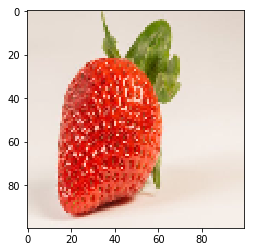

In [49]:
plt.imshow(img.reshape(100,100,3))

In [0]:
predict = model.predict([img])

In [51]:
dic_f[predict.argmax()]

'Strawberry'